In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

/Users/ykondo/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('reviews.csv')
df

,Unnamed: 0,album,artist,pub_date,release_date,label,rating,reviewer,genre,bnm,Playcount,Listeners,Duration,NumSongs,Genre1,Genre2,Genre3,Genre4,Genre5
0,0,Anguilla Electrica,Porter Ricks,July 8 2017,2017,Tresor,8.0,Andrew Gaerig,Electronic,NaN,8572.0,1229.0,2535.0,6.0,NaN,NaN,NaN,NaN,NaN
1,1,Grateful,DJ Khaled,July 8 2017,2017,Epic,5.2,Rebecca Haithcoat,Rap,NaN,372052.0,45545.0,5246.0,23.0,2017,Hip-Hop,rap,NaN,NaN
2,2,Metallica,Metallica,July 9 2017,1991,Elektra,7.7,Zoe Camp,Metal,NaN,22585392.0,1044467.0,3805.0,12.0,albums I own,heavy metal,metal,thrash metal,hard rock
3,3,Dribble EP,Sau Poler,July 10 2017,2017,Visions Fugitives,7.8,Ben Cardew,Electronic,NaN,6.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,4,White Halo,Heaven in Her Arms,July 10 2017,2017,Translation Loss,7.7,Andy O'Connor,Metal,NaN,3920.0,260.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN
5,5,Teething,Brightness,July 10 2017,2017,I Oh You,7.4,Shaad D?Souza,Rock,NaN,1867.0,227.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6,6,Like a Woman,Kacy Hill,July 10 2017,2017,G.O.O.D. Music,5.1,Claire Lobenfeld,Pop/R&B,NaN,47999.0,5768.0,1068.0,12.0,NaN,NaN,NaN,NaN,NaN
7,7,Hug of Thunder,Broken Social Scene,July 10 2017,2017,"Arts & Crafts,City Slang",8.4,Ian Cohen,Rock,Best new music,177108.0,20666.0,3134.0,12.0,2017,role certo,best albums of the 2010's,NaN,NaN
8,8,Bells for the South Side,Roscoe Mitchell,14 hrs ago,2017,ECM,7.3,Daniel Martin-McCormick,Jazz,NaN,574.0,46.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN
9,9,"N?dia ? M?, N?dia ? Fudida",N?dia,14 hrs ago,2017,Pr?ncipe Discos,7.8,Philip Sherburne,Electronic,NaN,1028.0,70.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df[df['pub_date'].str.contains("2002")]
df = df.drop(df.index[26479:27681])

In [5]:
df[df['pub_date'].str.contains("2001")]
df = df.drop(df.index[27682:28086])

In [6]:
df[df['pub_date'].str.contains("2000")]
df = df.drop(df.index[27896:28492])

In [7]:
df[df['pub_date'].str.contains("1999")]
df = df.drop(df.index[28297:28599])

In [8]:
df.drop(df.columns[[0, 3, 4, 14, 15,16,17,18]], axis=1, inplace = True)
df

,album,artist,label,rating,reviewer,genre,bnm,Playcount,Listeners,Duration,NumSongs
0,Anguilla Electrica,Porter Ricks,Tresor,8.0,Andrew Gaerig,Electronic,NaN,8572.0,1229.0,2535.0,6.0
1,Grateful,DJ Khaled,Epic,5.2,Rebecca Haithcoat,Rap,NaN,372052.0,45545.0,5246.0,23.0
2,Metallica,Metallica,Elektra,7.7,Zoe Camp,Metal,NaN,22585392.0,1044467.0,3805.0,12.0
3,Dribble EP,Sau Poler,Visions Fugitives,7.8,Ben Cardew,Electronic,NaN,6.0,2.0,0.0,0.0
4,White Halo,Heaven in Her Arms,Translation Loss,7.7,Andy O'Connor,Metal,NaN,3920.0,260.0,0.0,7.0
5,Teething,Brightness,I Oh You,7.4,Shaad D?Souza,Rock,NaN,1867.0,227.0,0.0,0.0
6,Like a Woman,Kacy Hill,G.O.O.D. Music,5.1,Claire Lobenfeld,Pop/R&B,NaN,47999.0,5768.0,1068.0,12.0
7,Hug of Thunder,Broken Social Scene,"Arts & Crafts,City Slang",8.4,Ian Cohen,Rock,Best new music,177108.0,20666.0,3134.0,12.0
8,Bells for the South Side,Roscoe Mitchell,ECM,7.3,Daniel Martin-McCormick,Jazz,NaN,574.0,46.0,0.0,11.0
9,"N?dia ? M?, N?dia ? Fudida",N?dia,Pr?ncipe Discos,7.8,Philip Sherburne,Electronic,NaN,1028.0,70.0,0.0,0.0


In [9]:
#converting rating column into float
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0)

In [10]:
df = df.fillna(0)

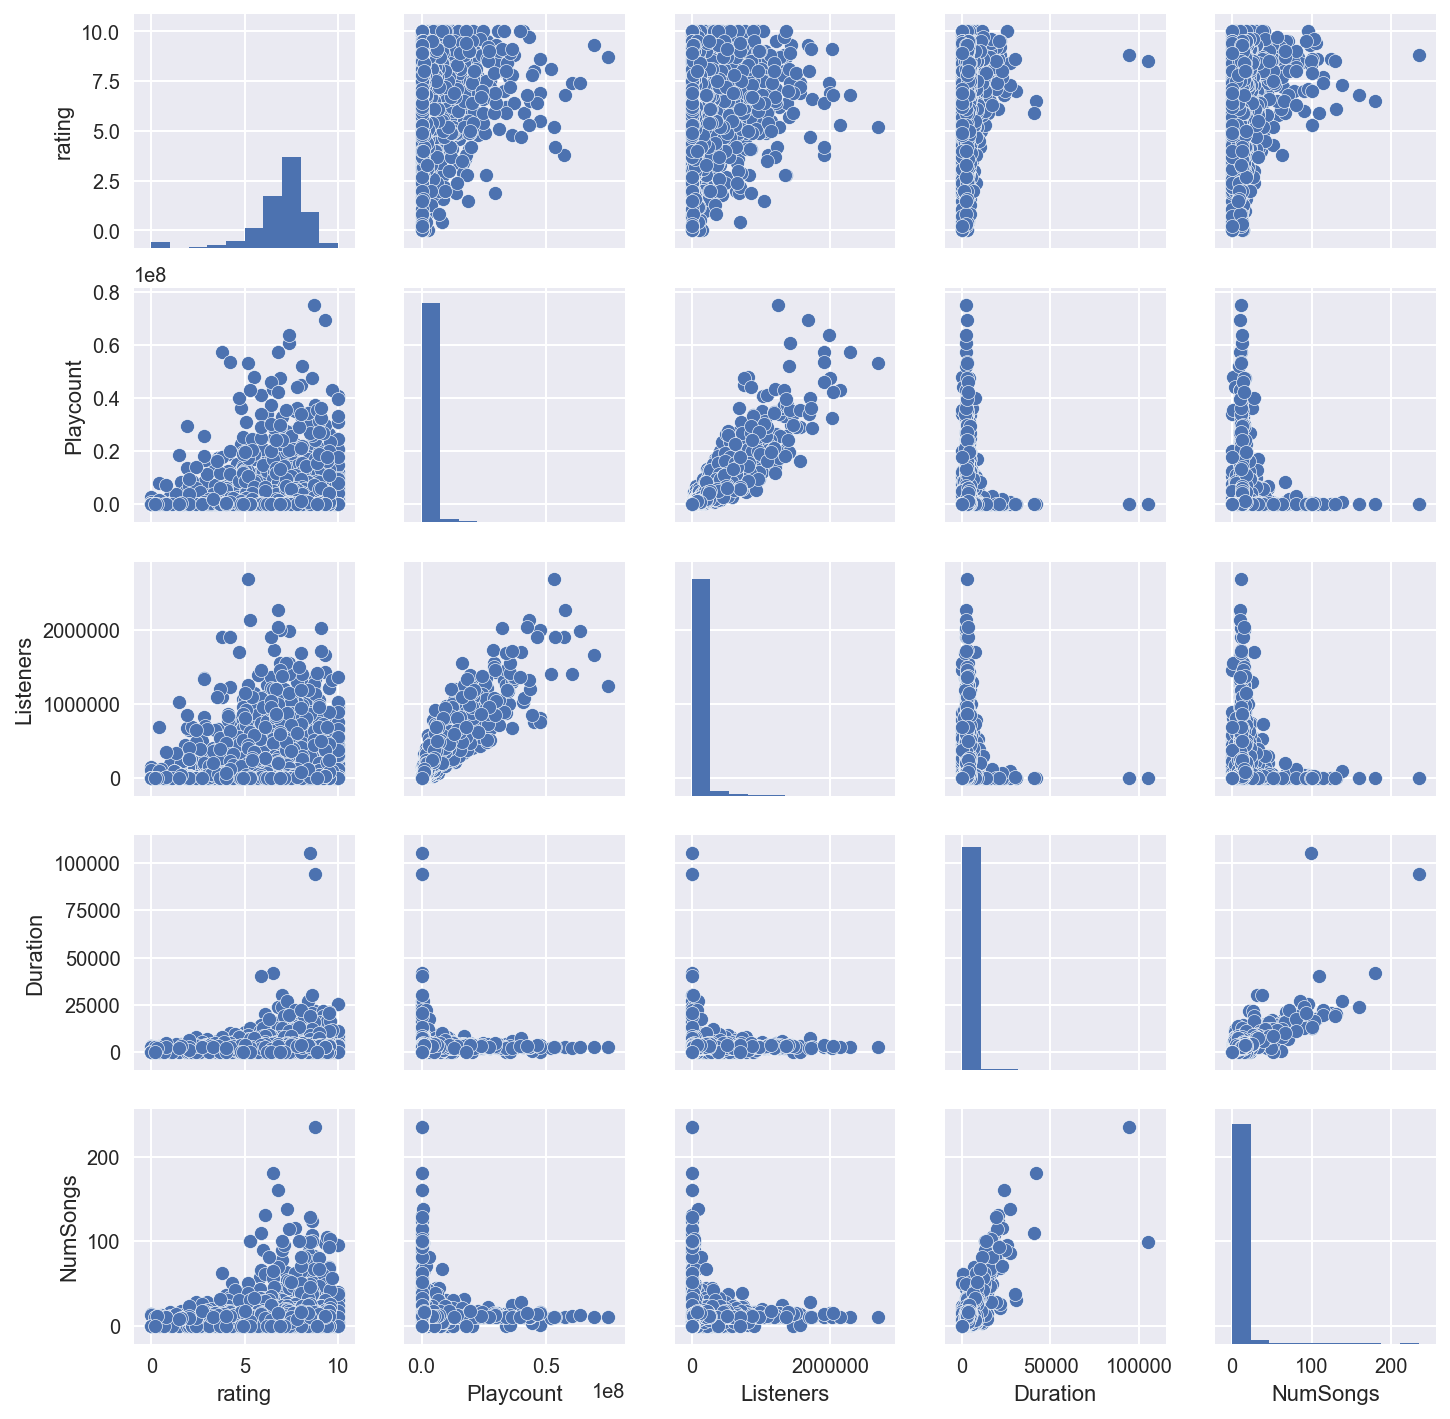

In [11]:
# Plot all of the variable-to-variable relations as scatterplots
plt.figure(figsize=(12,10))
sns.pairplot(df, size = 2, aspect=1)

In [12]:
df['Genre1']= df.genre.str.split('/|,').str[0]
df['Genre2']= df.genre.str.split('/|,').str[1]
df.drop(df.columns[[5]], axis=1, inplace = True)
df

,album,artist,label,rating,reviewer,bnm,Playcount,Listeners,Duration,NumSongs,Genre1,Genre2
0,Anguilla Electrica,Porter Ricks,Tresor,8.0,Andrew Gaerig,0,8572.0,1229.0,2535.0,6.0,Electronic,NaN
1,Grateful,DJ Khaled,Epic,5.2,Rebecca Haithcoat,0,372052.0,45545.0,5246.0,23.0,Rap,NaN
2,Metallica,Metallica,Elektra,7.7,Zoe Camp,0,22585392.0,1044467.0,3805.0,12.0,Metal,NaN
3,Dribble EP,Sau Poler,Visions Fugitives,7.8,Ben Cardew,0,6.0,2.0,0.0,0.0,Electronic,NaN
4,White Halo,Heaven in Her Arms,Translation Loss,7.7,Andy O'Connor,0,3920.0,260.0,0.0,7.0,Metal,NaN
5,Teething,Brightness,I Oh You,7.4,Shaad D?Souza,0,1867.0,227.0,0.0,0.0,Rock,NaN
6,Like a Woman,Kacy Hill,G.O.O.D. Music,5.1,Claire Lobenfeld,0,47999.0,5768.0,1068.0,12.0,Pop,R&B
7,Hug of Thunder,Broken Social Scene,"Arts & Crafts,City Slang",8.4,Ian Cohen,Best new music,177108.0,20666.0,3134.0,12.0,Rock,NaN
8,Bells for the South Side,Roscoe Mitchell,ECM,7.3,Daniel Martin-McCormick,0,574.0,46.0,0.0,11.0,Jazz,NaN
9,"N?dia ? M?, N?dia ? Fudida",N?dia,Pr?ncipe Discos,7.8,Philip Sherburne,0,1028.0,70.0,0.0,0.0,Electronic,NaN


In [13]:
df['album_count'] = int(1)
df['all_albums'] = int(1)

In [14]:
df.groupby(['Genre1']).count().sort_values('album_count',ascending=False).loc[:,['album_count']].reset_index()

,Genre1,album_count
0,Rock,9343
1,Electronic,5617
2,Experimental,2366
3,Rap,2294
4,Pop,1788
5,Metal,1077
6,Folk,956
7,Jazz,338
8,Global,262
9,genre,1


In [15]:
df.groupby(['Genre2']).count().sort_values('album_count',ascending=False).loc[:,['album_count']].reset_index()

,Genre2,album_count
0,Rock,3235
1,R&B,1788
2,Country,956
3,Pop,431
4,Experimental,279
5,Jazz,219
6,Metal,138
7,Rap,134
8,Global,58
9,Folk,45


In [16]:
#creating genre dummy variables
mygenres = ['Rock', 'Electronic', 'Experimental', 'Rap', 'Pop', 'Folk', 'Metal', 'Jazz', 'Global', 'R&B', 'Country']

def addGenre(dfRow,genre):
    if (dfRow['Genre1'] == genre):
        return 1
    elif (dfRow['Genre2'] == genre):
        return 1
    else:
        return 0

for genre in mygenres: 
    df[genre]=df.apply(addGenre, genre=genre, axis=1)

In [17]:
#who has reviewed the most
df['reviewer'].value_counts()

0                         15411
Ian Cohen                   744
Stuart Berman               474
Jayson Greene               408
Philip Sherburne            376
Andy Beta                   358
Stephen M. Deusner          296
Nick Neyland                290
Grayson Haver Currin        278
Marc Masters                260
Nate Patrin                 252
Jason Heller                224
Laura Snapes                218
Miles Raymer                204
Mark Richardson             186
Grayson Currin              184
Saby Reyes-Kulkarni         170
Zoe Camp                    168
Jonah Bromwich              168
Andrew Gaerig               166
Evan Minsker                164
Paul Thompson               162
Sheldon Pearce              154
Seth Colter Walls           154
Larry Fitzmaurice           152
Brian Howe                  150
Lindsay Zoladz              150
Andy O'Connor               148
Kevin Lozano                130
Evan Rytlewski              130
                          ...  
Jason Gr

In [18]:
#creating genre dummy variables - reviewers with 100 more reviews or more 
myreviewers = ['Ian Cohen', 'Stuart Berman', 'Jayson Greene', 'Philip Sherburne', 'Andy Beta', 'Stephen M. Deusner', 'Nick Neyland','Grayson Haver Currin', 'Marc Masters', 'Nate Patrin']

def addReviewers(dfRow,reviewer):
    if (dfRow['reviewer'] == reviewer):
        return 1
    else:
        return 0

for reviewer in myreviewers: 
    df[reviewer]=df.apply(addReviewers, reviewer=reviewer, axis=1)

df

,album,artist,label,rating,reviewer,bnm,Playcount,Listeners,Duration,NumSongs,...,Ian Cohen,Stuart Berman,Jayson Greene,Philip Sherburne,Andy Beta,Stephen M. Deusner,Nick Neyland,Grayson Haver Currin,Marc Masters,Nate Patrin
0,Anguilla Electrica,Porter Ricks,Tresor,8.0,Andrew Gaerig,0,8572.0,1229.0,2535.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,Grateful,DJ Khaled,Epic,5.2,Rebecca Haithcoat,0,372052.0,45545.0,5246.0,23.0,...,0,0,0,0,0,0,0,0,0,0
2,Metallica,Metallica,Elektra,7.7,Zoe Camp,0,22585392.0,1044467.0,3805.0,12.0,...,0,0,0,0,0,0,0,0,0,0
3,Dribble EP,Sau Poler,Visions Fugitives,7.8,Ben Cardew,0,6.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,White Halo,Heaven in Her Arms,Translation Loss,7.7,Andy O'Connor,0,3920.0,260.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
5,Teething,Brightness,I Oh You,7.4,Shaad D?Souza,0,1867.0,227.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,Like a Woman,Kacy Hill,G.O.O.D. Music,5.1,Claire Lobenfeld,0,47999.0,5768.0,1068.0,12.0,...,0,0,0,0,0,0,0,0,0,0
7,Hug of Thunder,Broken Social Scene,"Arts & Crafts,City Slang",8.4,Ian Cohen,Best new music,177108.0,20666.0,3134.0,12.0,...,1,0,0,0,0,0,0,0,0,0
8,Bells for the South Side,Roscoe Mitchell,ECM,7.3,Daniel Martin-McCormick,0,574.0,46.0,0.0,11.0,...,0,0,0,0,0,0,0,0,0,0
9,"N?dia ? M?, N?dia ? Fudida",N?dia,Pr?ncipe Discos,7.8,Philip Sherburne,0,1028.0,70.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
#creating bnm dummy variables
bnm_dummy = pd.get_dummies(df['bnm'])
df = pd.concat([df, bnm_dummy], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bb252e8>]], dtype=object)

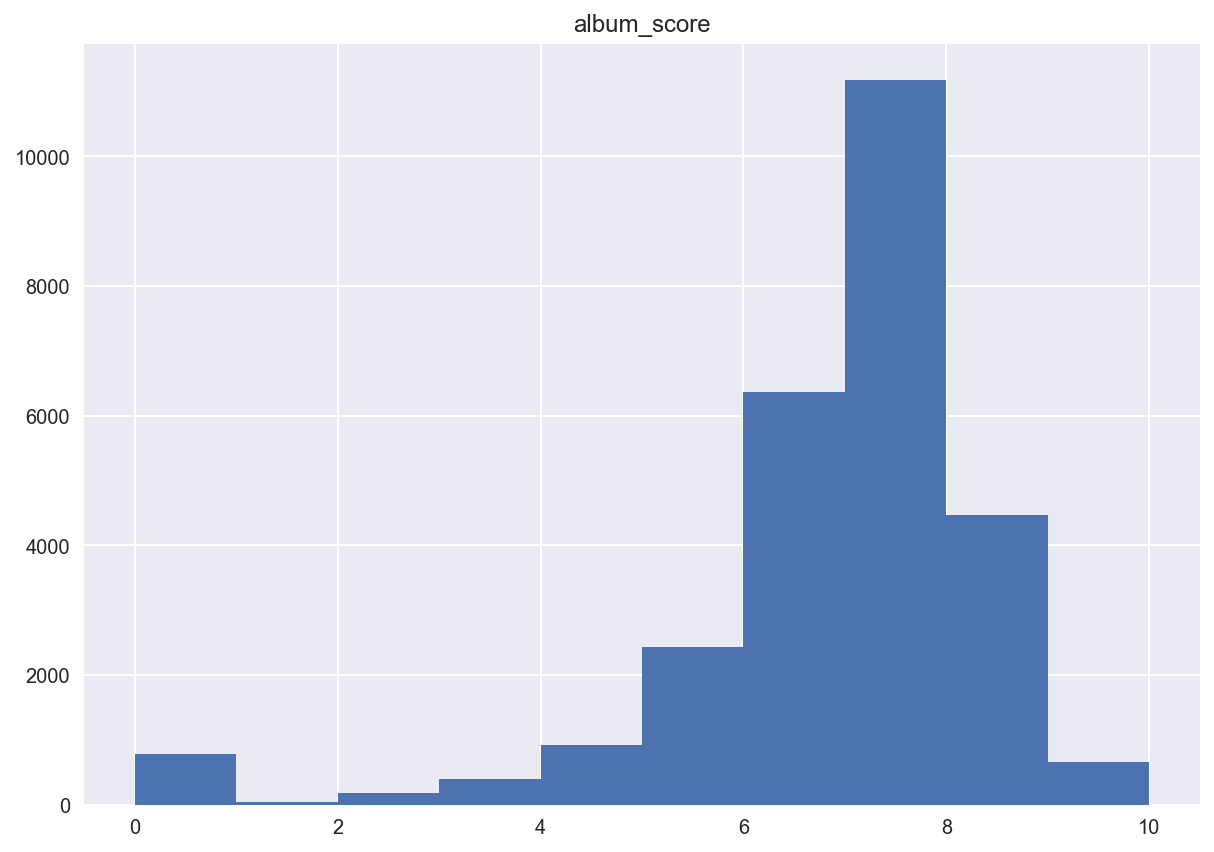

In [20]:
#Looking at the distribution of the ratings
plt.rcParams['figure.figsize'] = (10, 7)
rating = pd.DataFrame({"album_score":df["rating"]})
rating.hist()

(array([  2.67910000e+04,   3.65000000e+02,   1.33000000e+02,
          4.50000000e+01,   3.50000000e+01,   1.10000000e+01,
          9.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          3.00000000e+00]),
 array([        0. ,   7496287.5,  14992575. ,  22488862.5,  29985150. ,
         37481437.5,  44977725. ,  52474012.5,  59970300. ,  67466587.5,
         74962875. ]),
 <a list of 10 Patch objects>)

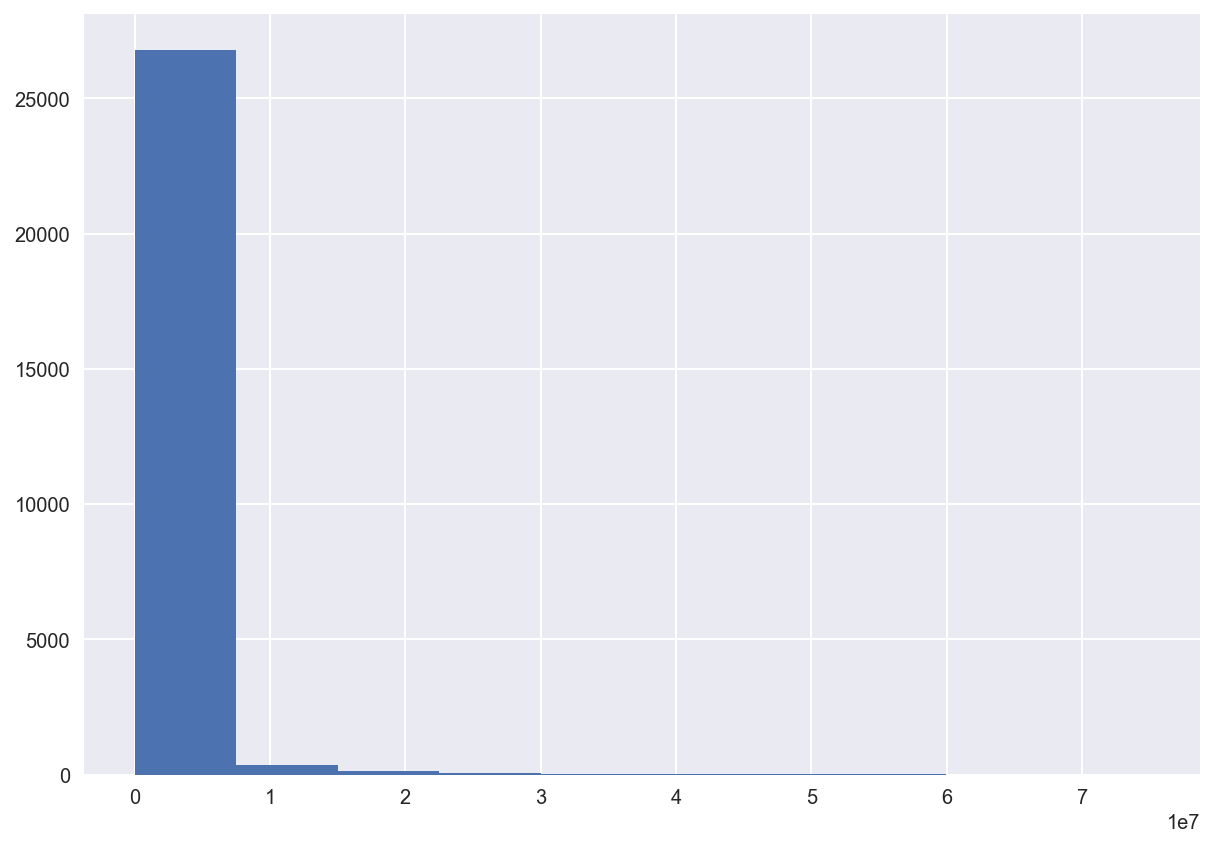

In [21]:
#Playcount analysis
plt.hist(df[np.isfinite(df.Playcount)]['Playcount'])

(array([  233.,   336.,   598.,   895.,  1788.,  4256.,  6355.,  4605.,
         1950.,   320.]),
 array([ 0.        ,  0.78748462,  1.57496925,  2.36245387,  3.14993849,
         3.93742312,  4.72490774,  5.51239236,  6.29987699,  7.08736161,
         7.87484623]),
 <a list of 10 Patch objects>)

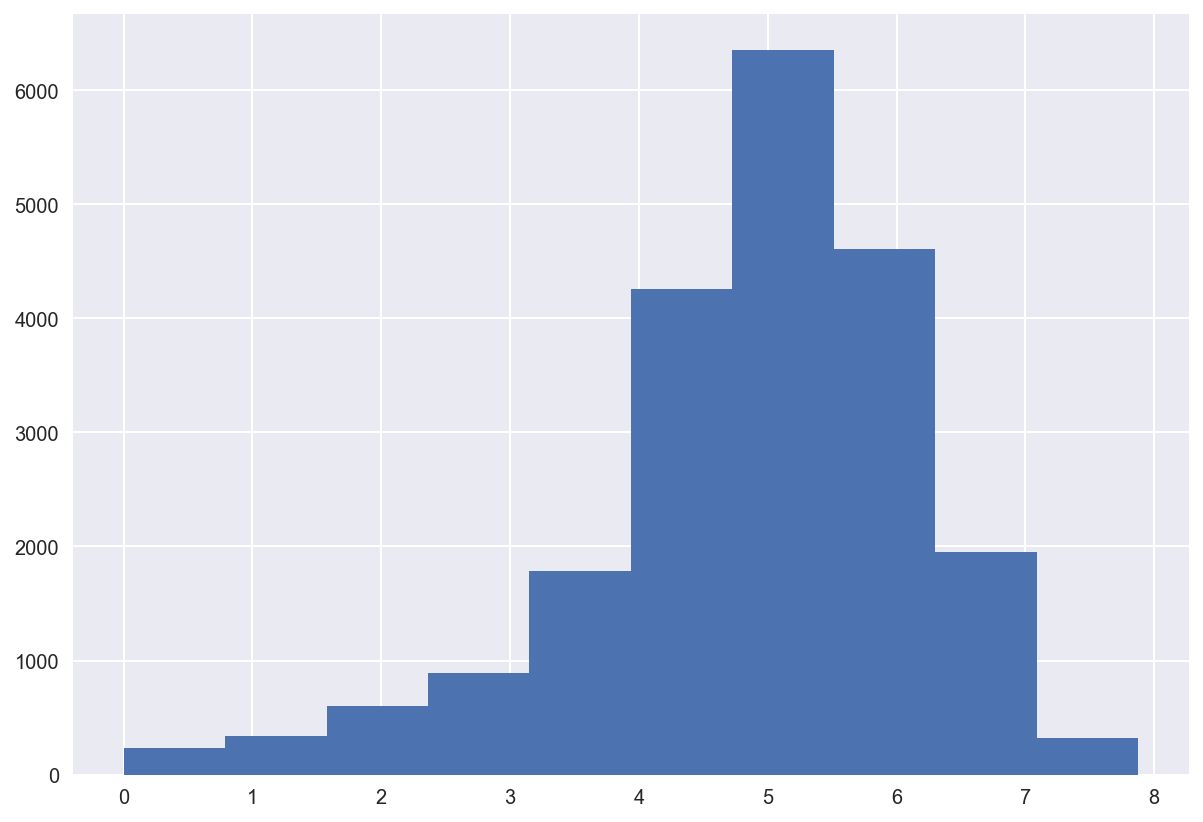

In [22]:
#need to log playcount
playcount_values = df[(np.isfinite(df.Playcount)) & (df['Playcount'] >= 1)].dropna(subset=['Genre1']).reset_index(drop=True)['Playcount']
plt.hist(np.log10(playcount_values))

In [23]:
df['log_playcounts'] = np.log10(playcount_values)

(array([  2.72530000e+04,   1.21000000e+02,   1.90000000e+01,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([      0. ,   10533.6,   21067.2,   31600.8,   42134.4,   52668. ,
          63201.6,   73735.2,   84268.8,   94802.4,  105336. ]),
 <a list of 10 Patch objects>)

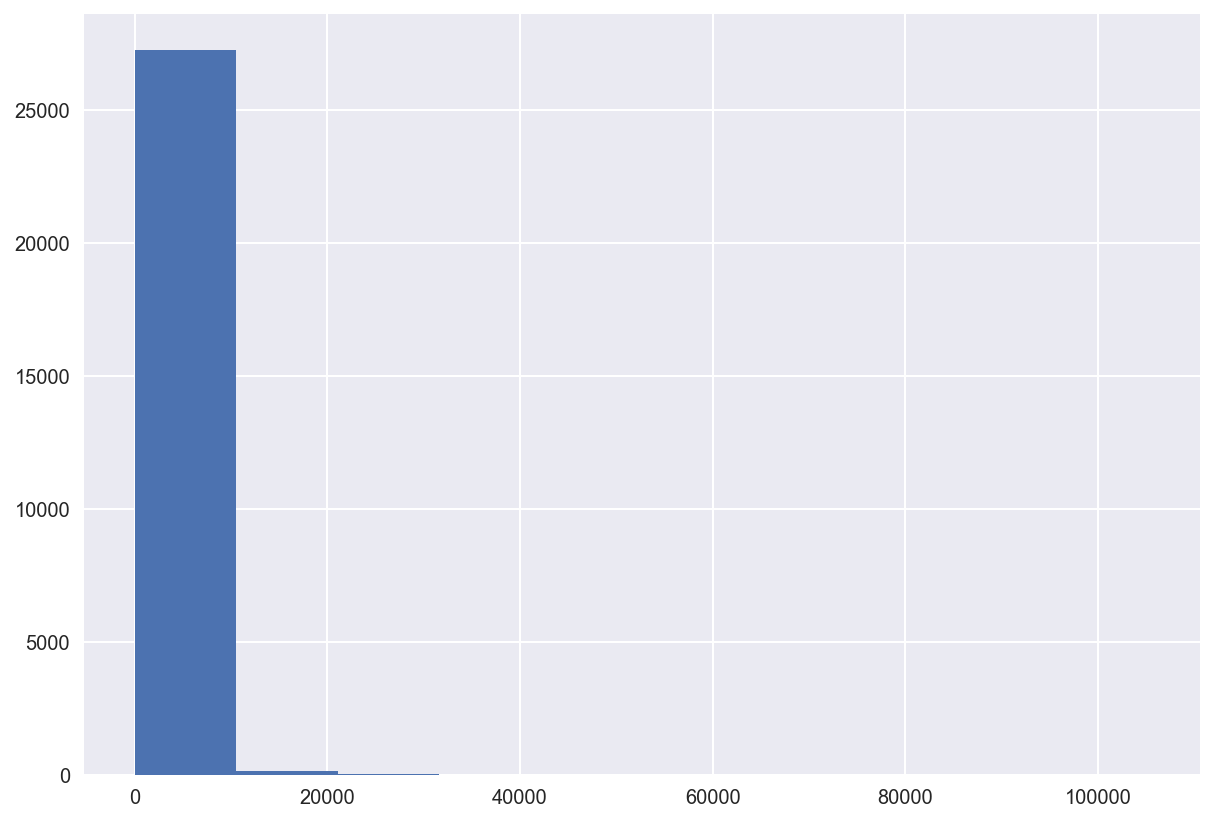

In [24]:
plt.hist(df['Duration'])

(array([  3.00000000e+00,   0.00000000e+00,   1.30000000e+01,
          8.30000000e+01,   2.97000000e+02,   7.78600000e+03,
          9.15800000e+03,   4.03000000e+02,   5.10000000e+01,
          4.00000000e+00]),
 array([ 1.04139269,  1.43473405,  1.82807542,  2.22141678,  2.61475815,
         3.00809951,  3.40144088,  3.79478224,  4.18812361,  4.58146498,
         4.97480634]),
 <a list of 10 Patch objects>)

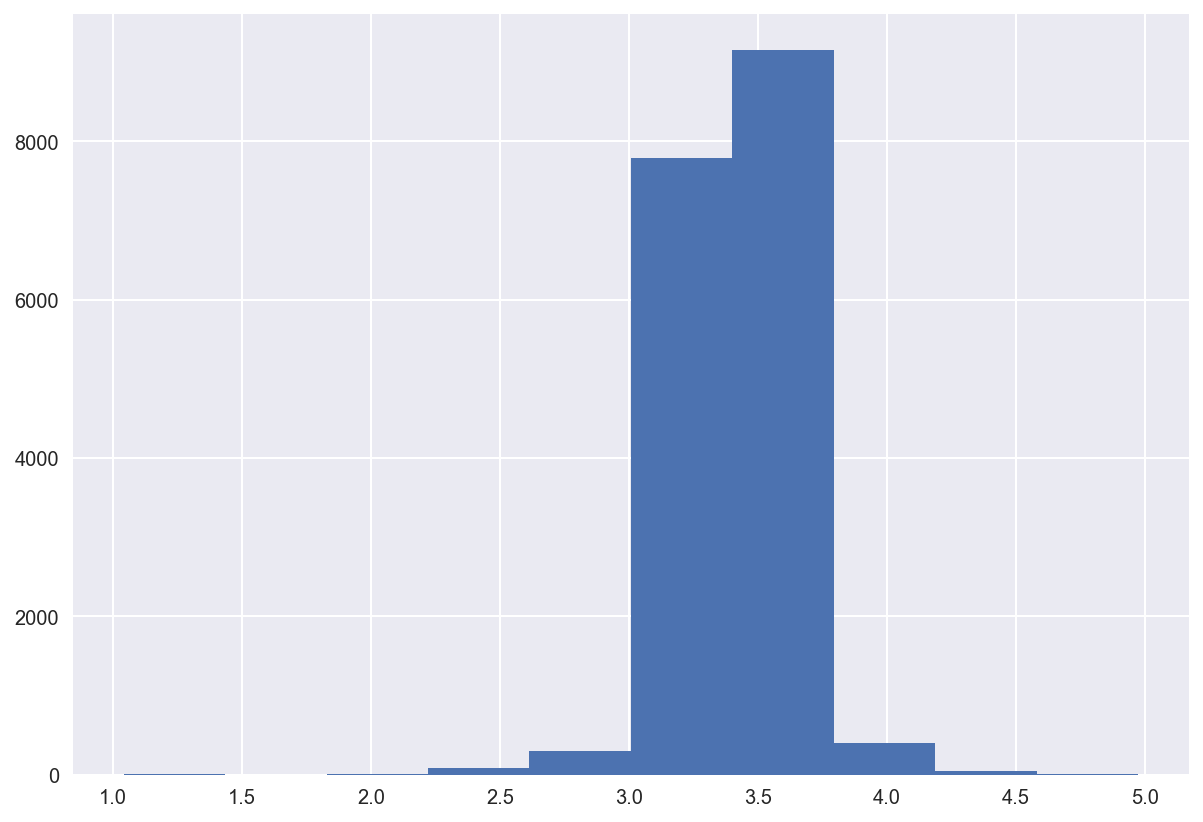

In [25]:
duration_values = df[(np.isfinite(df.Duration)) & (df['Duration'] >= 1)].dropna(subset=['Genre1']).reset_index(drop=True)['Duration']
plt.hist(np.log10(duration_values))

In [26]:
df['log_duration'] = np.log10(duration_values)

(array([  2.68530000e+04,   4.43000000e+02,   5.60000000e+01,
          1.70000000e+01,   1.80000000e+01,   6.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([   0. ,   23.5,   47. ,   70.5,   94. ,  117.5,  141. ,  164.5,
         188. ,  211.5,  235. ]),
 <a list of 10 Patch objects>)

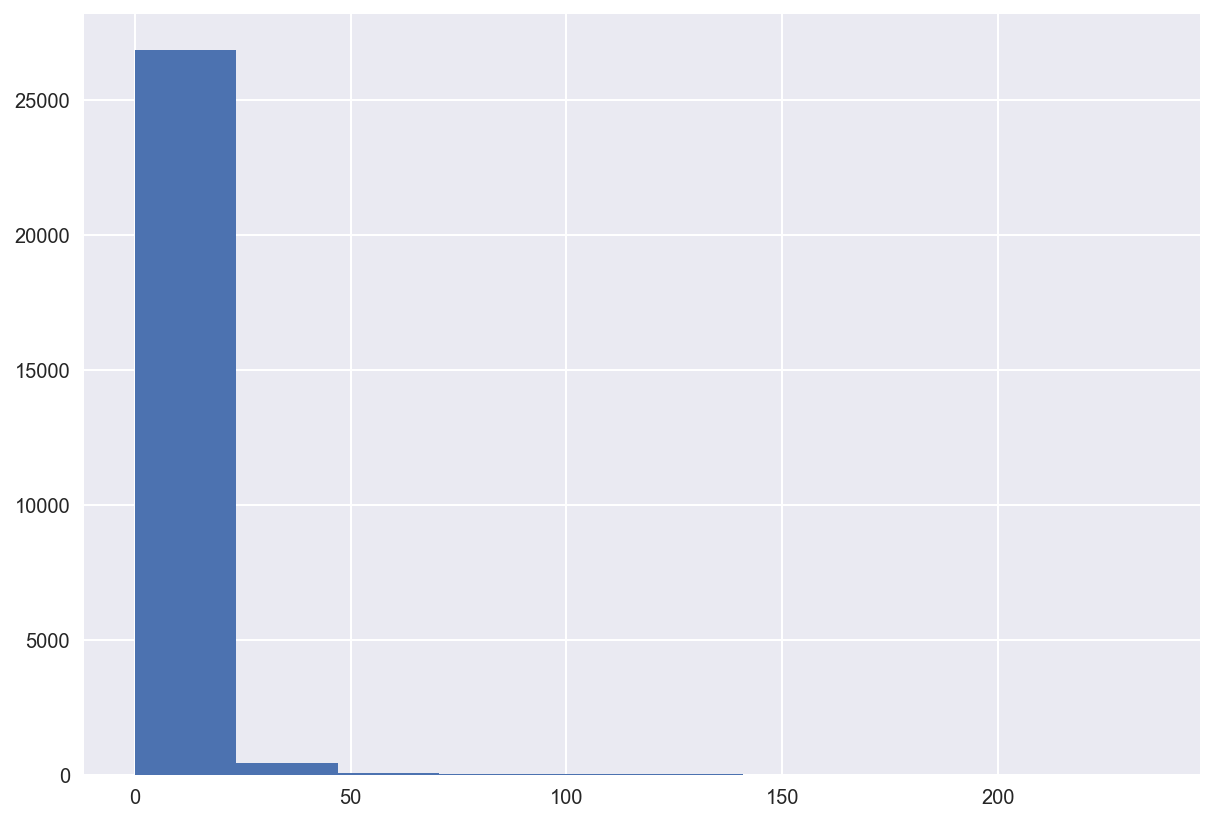

In [27]:
plt.hist(df.NumSongs)

(array([  6.90000000e+01,   1.39000000e+02,   8.93000000e+02,
          2.02900000e+03,   1.26530000e+04,   1.75900000e+03,
          2.86000000e+02,   6.60000000e+01,   3.30000000e+01,
          6.00000000e+00]),
 array([ 0.        ,  0.23710679,  0.47421357,  0.71132036,  0.94842714,
         1.18553393,  1.42264072,  1.6597475 ,  1.89685429,  2.13396108,
         2.37106786]),
 <a list of 10 Patch objects>)

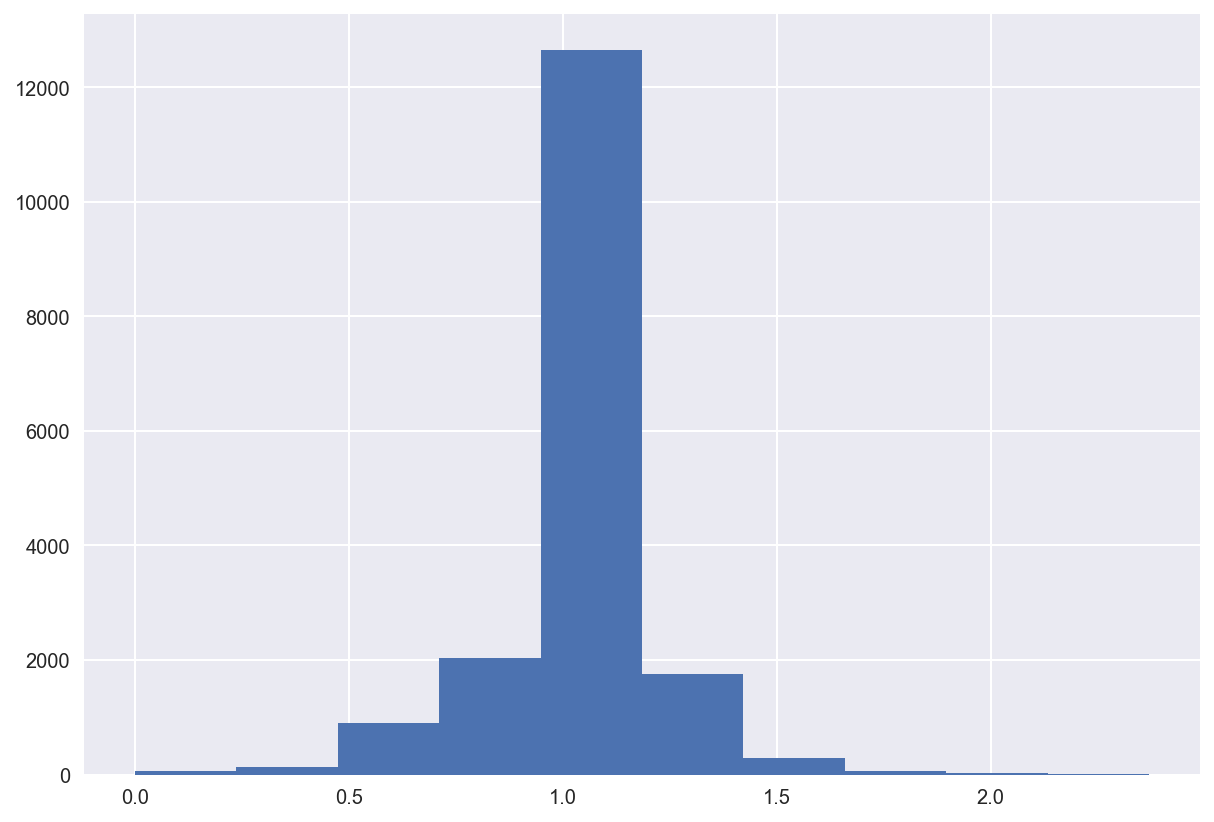

In [28]:
NumSongs_values = df[(np.isfinite(df.NumSongs)) & (df['NumSongs'] >= 1)].dropna(subset=['Genre1']).reset_index(drop=True)['NumSongs']
plt.hist(np.log10(NumSongs_values))

In [29]:
df['log_NumSongs'] = np.log10(NumSongs_values)

In [30]:
df.rename(columns={'Best new music': 'best_new_music', 'Best new reissue': 'best_new_reissue',  'R&B': 'RB'}, inplace=True)

In [31]:
df.rename(columns={'Ian Cohen': 'IanC', 'Stuart Berman': 'StuartB',  'Jayson Greene': 'JaysonG', 'Philip Sherburne': 'PhilipS', 'Andy Beta': 'AndyB', 'Stephen M. Deusner': 'StephenD', 'Nick Neyland': 'NickN', 'Grayson Haver Currin': 'GraysonC', 'Marc Masters': 'MarcM', 'Nate Patrin': 'NateP'}, inplace=True)

In [32]:
list(df)

['album',
 'artist',
 'label',
 'rating',
 'reviewer',
 'bnm',
 'Playcount',
 'Listeners',
 'Duration',
 'NumSongs',
 'Genre1',
 'Genre2',
 'album_count',
 'all_albums',
 'Rock',
 'Electronic',
 'Experimental',
 'Rap',
 'Pop',
 'Folk',
 'Metal',
 'Jazz',
 'Global',
 'RB',
 'Country',
 'IanC',
 'StuartB',
 'JaysonG',
 'PhilipS',
 'AndyB',
 'StephenD',
 'NickN',
 'GraysonC',
 'MarcM',
 'NateP',
 0,
 'best_new_music',
 'best_new_reissue',
 'Best new reissue,Best new reissue',
 'Best new reissue,Best new reissue,Best new reissue',
 'Best new reissue,Best new reissue,Best new reissue,Best new reissue',
 'Best new reissue,Best new reissue,Best new reissue,Best new reissue,Best new reissue',
 'Best new reissue,Best new reissue,Best new reissue,Best new reissue,Best new reissue,Best new reissue',
 'bnm',
 'log_playcounts',
 'log_duration',
 'log_NumSongs']

In [33]:
df_new = df[['album', 'artist', 'label', 'Listeners', 'rating', 'best_new_music', 'best_new_reissue', 'log_playcounts', 'log_duration', 'log_NumSongs', 'Rock',
 'Electronic',
 'Experimental',
 'Rap',
 'Pop',
 'Folk',
 'Metal',
 'Jazz',
 'Global',
 'RB',
 'Country',
 'IanC',
 'StuartB',
 'JaysonG',
 'PhilipS',
 'AndyB',
 'StephenD',
 'NickN',
 'GraysonC',
 'MarcM',
 'NateP']].copy()

In [34]:
df_new = df_new.fillna(0)
list(df)

['album',
 'artist',
 'label',
 'rating',
 'reviewer',
 'bnm',
 'Playcount',
 'Listeners',
 'Duration',
 'NumSongs',
 'Genre1',
 'Genre2',
 'album_count',
 'all_albums',
 'Rock',
 'Electronic',
 'Experimental',
 'Rap',
 'Pop',
 'Folk',
 'Metal',
 'Jazz',
 'Global',
 'RB',
 'Country',
 'IanC',
 'StuartB',
 'JaysonG',
 'PhilipS',
 'AndyB',
 'StephenD',
 'NickN',
 'GraysonC',
 'MarcM',
 'NateP',
 0,
 'best_new_music',
 'best_new_reissue',
 'Best new reissue,Best new reissue',
 'Best new reissue,Best new reissue,Best new reissue',
 'Best new reissue,Best new reissue,Best new reissue,Best new reissue',
 'Best new reissue,Best new reissue,Best new reissue,Best new reissue,Best new reissue',
 'Best new reissue,Best new reissue,Best new reissue,Best new reissue,Best new reissue,Best new reissue',
 'bnm',
 'log_playcounts',
 'log_duration',
 'log_NumSongs']

In [35]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('rating ~ Listeners + best_new_music + best_new_reissue + log_playcounts + log_duration + log_NumSongs + Rock + Electronic + Experimental + Rap + Pop + Folk + Metal + Jazz + Global + RB + Country + IanC + StuartB + JaysonG + PhilipS + AndyB + StephenD + NickN + GraysonC + MarcM +NateP', data=df_new, return_type="dataframe")
# Create your mode
model = sm.OLS(y, X)
# Fit your model to your training set
fit1 = model.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     73.74
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        05:15:22   Log-Likelihood:                -51704.
No. Observations:               27398   AIC:                         1.035e+05
Df Residuals:                   27370   BIC:                         1.037e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            6.9073      0.029    237.265      0.000         6.850     6.964
Listeners          4.38e-07   8.26e-08      5.302      0.000      2.76e-07     6e-07
best_new_music       1.8084      0.052     35.000      0.000         1.707     1.910
best_new_reissue     1.0235      0.069     14.892      0.000         0.889     1.158
log_playcounts      -0.0225      0.005     -4.162      0.000        -0.033    -0.012
log_duration         0.0522      0.018      2.970      0.003         0.018     0.087
log_NumSongs        -0.0193      0.055     -0.353      0.724        -0.126     0.088
Rock                -0.3214      0.025    -12.978      0.000        -0.370    -0.273
Electronic          -0.1963      0.027     -7.174      0.000        -0.250    -0.143
Experimental         0.1479      0.034      4.347      0.000         0.081     0.215
Rap                 -0.2085      0.039     -5.315      0.000        -0.285    -0.132
Pop                 -0.2401      0.080     -3.008      0.003        -0.396    -0.084
Folk                -0.0323      0.239     -0.135      0.892        -0.501     0.436
Metal               -0.0620      0.049     -1.268      0.205        -0.158     0.034
Jazz                 0.2015      0.070      2.879      0.004         0.064     0.339
Global               0.2975      0.092      3.222      0.001         0.117     0.478
RB                   0.0044      0.089      0.049      0.961        -0.171     0.179
Country              0.0788      0.245      0.322      0.747        -0.401     0.559
IanC                -0.2057      0.060     -3.405      0.001        -0.324    -0.087
StuartB              0.2963      0.075      3.941      0.000         0.149     0.444
JaysonG             -0.0562      0.081     -0.697      0.486        -0.214     0.102
PhilipS              0.4222      0.085      4.963      0.000         0.255     0.589
AndyB               -0.1200      0.087     -1.386      0.166        -0.290     0.050
StephenD            -0.1663      0.094     -1.760      0.078        -0.352     0.019
NickN               -0.1691      0.095     -1.776      0.076        -0.356     0.018
GraysonC             0.3606      0.099      3.659      0.000         0.167     0.554
MarcM                0.0154      0.101      0.153      0.878        -0.182     0.213
NateP                0.1436      0.102      1.407      0.159        -0.056     0.344
==============================================================================
Omnibus:                    14066.756   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94303.257
Skew:                          -2.432   Prob(JB):                         0.00
Kurtosis:                      10.677   Cond. No.                     4.52e+06
=====================================================

In [108]:
#deleted number of songs, folk, metal, metal, R&B (??), Country, and reviewers with high pvalues
#NateP MarcM NickN StephenD AndyB
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('rating ~ Listeners + best_new_music + best_new_reissue + log_playcounts + log_duration + Rock + Electronic + Experimental + Rap + Pop + Jazz + Global +  IanC + StuartB + PhilipS + GraysonC', data=df_new, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit2 = model.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     123.6
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:43:47   Log-Likelihood:                -51710.
No. Observations:               27398   AIC:                         1.035e+05
Df Residuals:                   27381   BIC:                         1.036e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            6.9047      0.027    258.652      0.000         6.852     6.957
Listeners         4.414e-07   8.26e-08      5.345      0.000       2.8e-07  6.03e-07
best_new_music       1.8108      0.052     35.091      0.000         1.710     1.912
best_new_reissue     1.0222      0.069     14.903      0.000         0.888     1.157
log_playcounts      -0.0228      0.005     -4.227      0.000        -0.033    -0.012
log_duration         0.0443      0.008      5.662      0.000         0.029     0.060
Rock                -0.3212      0.023    -13.910      0.000        -0.366    -0.276
Electronic          -0.1946      0.026     -7.564      0.000        -0.245    -0.144
Experimental         0.1474      0.033      4.405      0.000         0.082     0.213
Rap                 -0.1985      0.038     -5.283      0.000        -0.272    -0.125
Pop                 -0.2312      0.038     -6.009      0.000        -0.307    -0.156
Jazz                 0.2051      0.069      2.953      0.003         0.069     0.341
Global               0.2947      0.091      3.251      0.001         0.117     0.472
IanC                -0.1962      0.060     -3.256      0.001        -0.314    -0.078
StuartB              0.3055      0.075      4.075      0.000         0.159     0.452
PhilipS              0.4312      0.085      5.085      0.000         0.265     0.597
GraysonC             0.3550      0.097      3.649      0.000         0.164     0.546
==============================================================================
Omnibus:                    14072.797   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94414.388
Skew:                          -2.433   Prob(JB):                         0.00
Kurtosis:                      10.682   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#Deleted all of the reivewers
#GraysonC PhilipS StuartB IanC
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('rating ~ Listeners + best_new_music + best_new_reissue + log_playcounts + log_duration + Rock + Electronic + Experimental + Rap + Pop + Jazz + Global', data=df_new, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit3 = model.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     158.9
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        05:15:23   Log-Likelihood:                -51744.
No. Observations:               27398   AIC:                         1.035e+05
Df Residuals:                   27385   BIC:                         1.036e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            6.9139      0.027    259.405      0.000         6.862     6.966
Listeners         4.316e-07   8.27e-08      5.222      0.000       2.7e-07  5.94e-07
best_new_music       1.8040      0.052     34.931      0.000         1.703     1.905
best_new_reissue     1.0242      0.069     14.924      0.000         0.890     1.159
log_playcounts      -0.0229      0.005     -4.254      0.000        -0.033    -0.012
log_duration         0.0485      0.008      6.264      0.000         0.033     0.064
Rock                -0.3352      0.023    -14.651      0.000        -0.380    -0.290
Electronic          -0.1852      0.025     -7.272      0.000        -0.235    -0.135
Experimental         0.1531      0.033      4.575      0.000         0.088     0.219
Rap                 -0.2215      0.037     -5.915      0.000        -0.295    -0.148
Pop                 -0.2487      0.038     -6.474      0.000        -0.324    -0.173
Jazz                 0.1965      0.070      2.827      0.005         0.060     0.333
Global               0.2852      0.091      3.143      0.002         0.107     0.463
==============================================================================
Omnibus:                    14033.391   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93592.419
Skew:                          -2.427   Prob(JB):                         0.00
Kurtosis:                      10.643   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#Deleted Jazz and Global
# Create your feature matrix (X) and target vector (y)
y_4, X_4 = patsy.dmatrices('rating ~ Listeners + best_new_music + best_new_reissue + log_playcounts + log_duration + Rock + Electronic + Experimental + Rap + Pop', data=df_new, return_type="dataframe")
# Create your mode
model = sm.OLS(y_4, X_4)
# Fit your model to your training set
fit4 = model.fit()
slope = fit4.params[1]
intercept = fit4.params[0]
# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     188.7
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        09:42:26   Log-Likelihood:                -51753.
No. Observations:               27398   AIC:                         1.035e+05
Df Residuals:                   27387   BIC:                         1.036e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            6.9365      0.026    265.839      0.000         6.885     6.988
Listeners         4.287e-07   8.27e-08      5.185      0.000      2.67e-07  5.91e-07
best_new_music       1.8027      0.052     34.896      0.000         1.701     1.904
best_new_reissue     1.0345      0.069     15.081      0.000         0.900     1.169
log_playcounts      -0.0231      0.005     -4.291      0.000        -0.034    -0.013
log_duration         0.0474      0.008      6.128      0.000         0.032     0.063
Rock                -0.3532      0.022    -15.713      0.000        -0.397    -0.309
Electronic          -0.1920      0.025     -7.551      0.000        -0.242    -0.142
Experimental         0.1492      0.033      4.460      0.000         0.084     0.215
Rap                 -0.2386      0.037     -6.407      0.000        -0.312    -0.166
Pop                 -0.2561      0.038     -6.677      0.000        -0.331    -0.181
==============================================================================
Omnibus:                    14019.712   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93307.331
Skew:                          -2.425   Prob(JB):                         0.00
Kurtosis:                      10.629   Cond. No.                     9.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

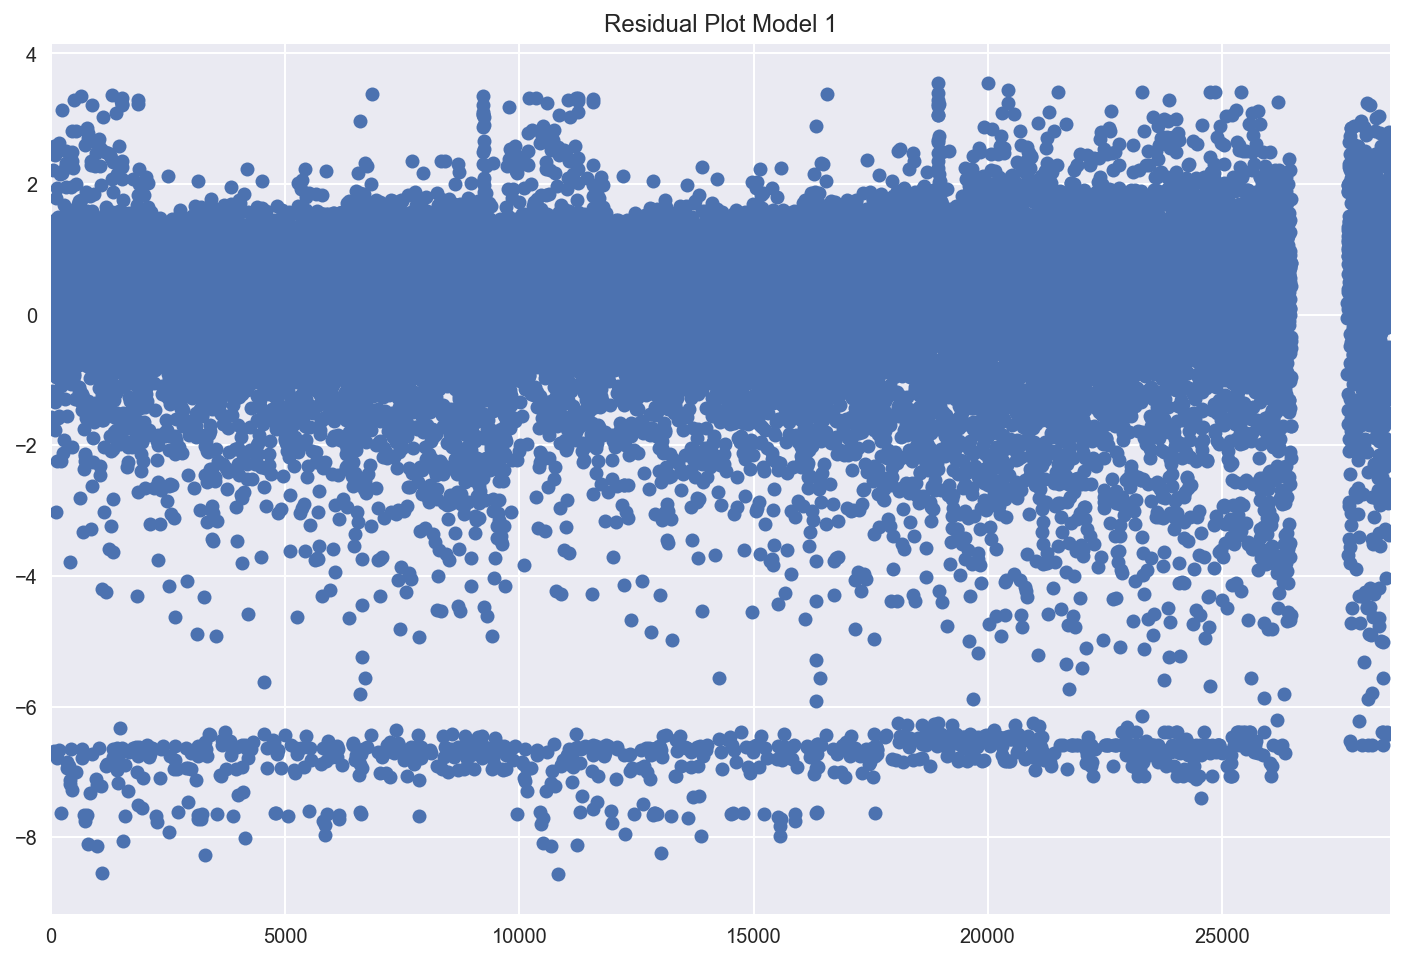

In [116]:
# Use statsmodels to plot the residuals
fit1.resid.plot(style='o', figsize=(12,8))
plt.title('Residual Plot Model 1')

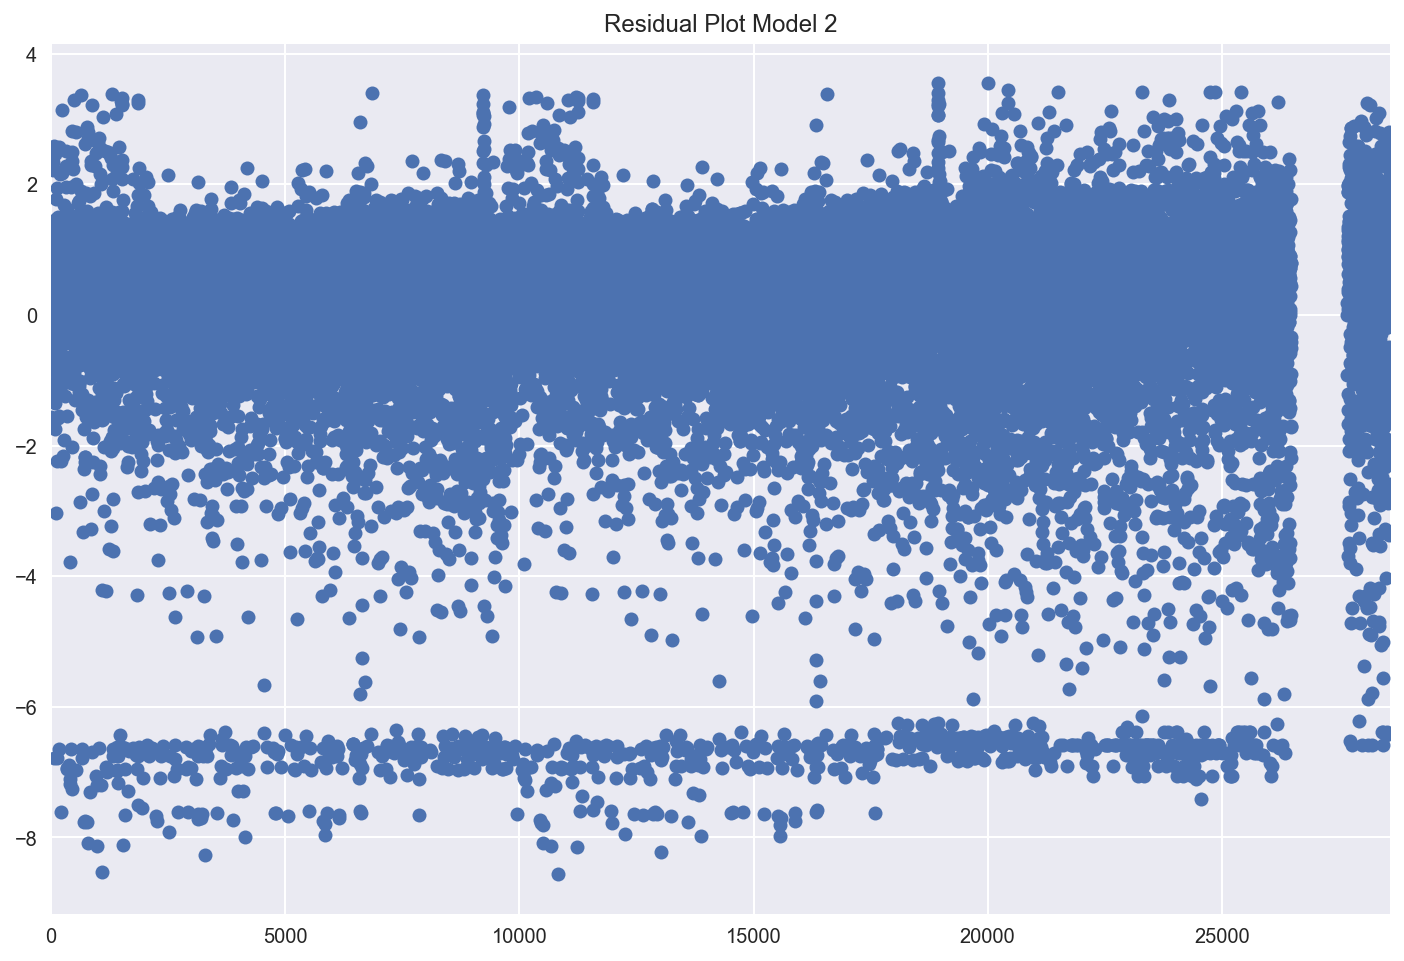

In [103]:
# Use statsmodels to plot the residuals
fit2.resid.plot(style='o', figsize=(12,8))
plt.title('Residual Plot Model 2')

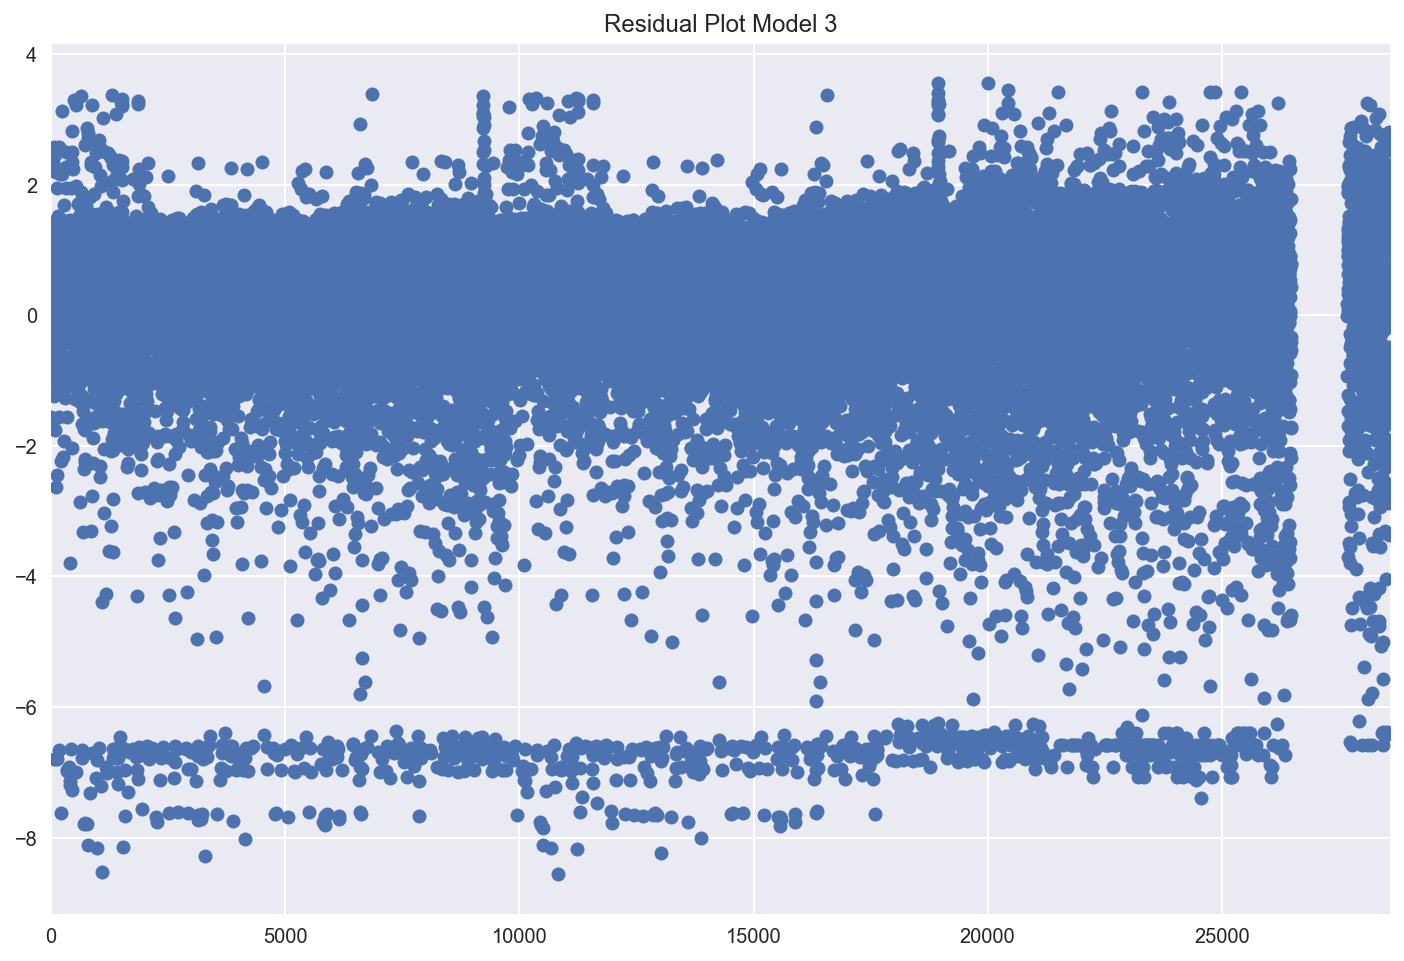

In [104]:
# Use statsmodels to plot the residuals
fit3.resid.plot(style='o', figsize=(12,8))
plt.title('Residual Plot Model 3')

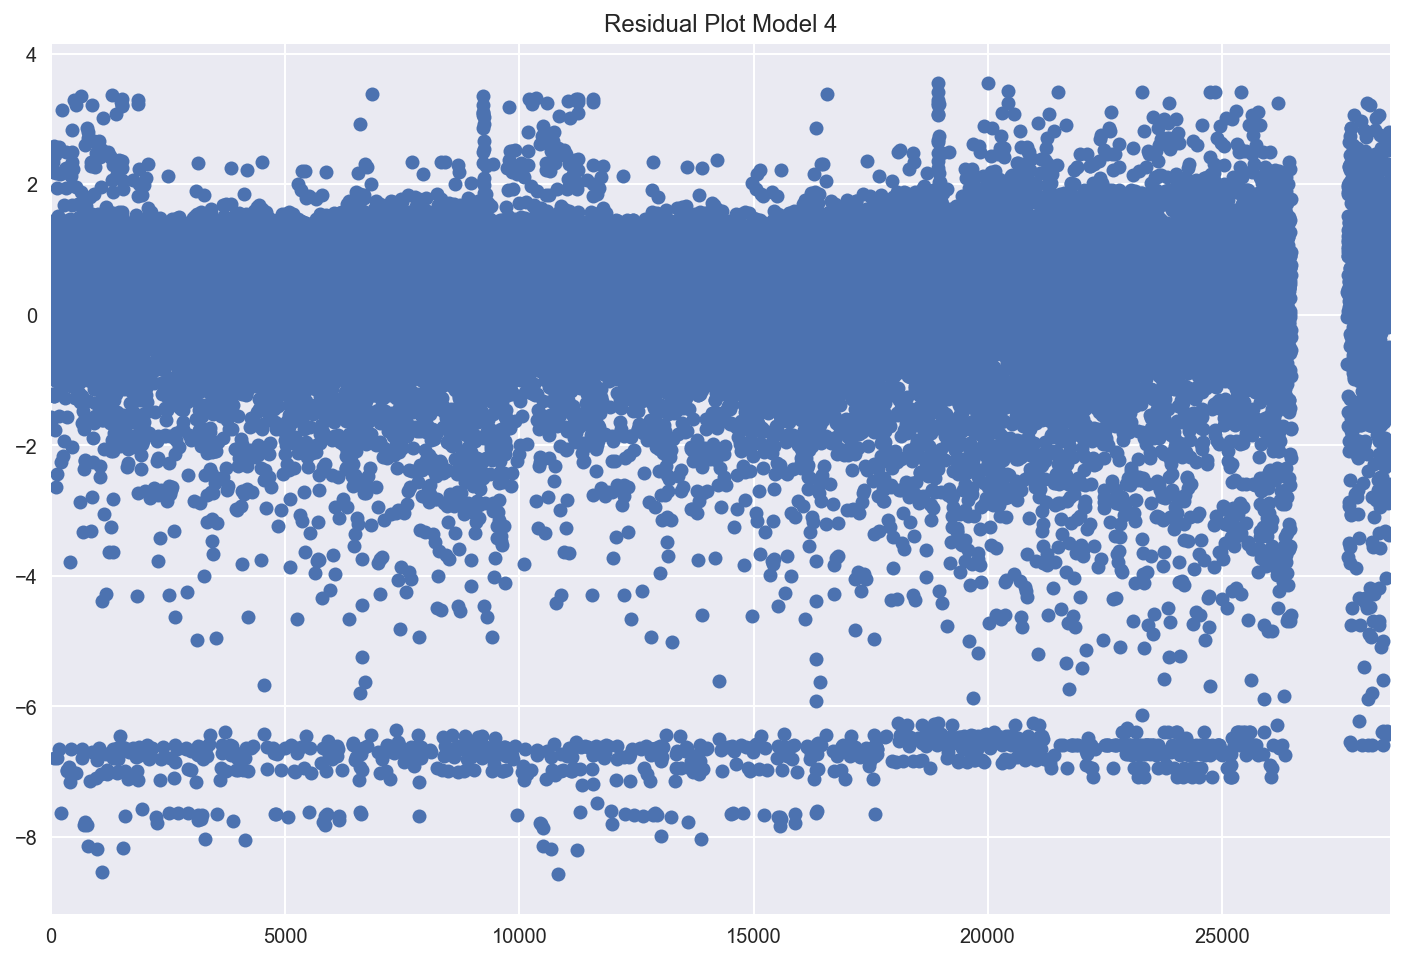

In [105]:
# Use statsmodels to plot the residuals
fit4.resid.plot(style='o', figsize=(12,8))
plt.title('Residual Plot Model 4')

In [43]:
df_new = df_new.fillna(0)

In [48]:
from sklearn import feature_selection as f_select
#model 1
y_1 = df_new.rating
X_1 = df_new.drop(['rating','label','album','artist'],1)

lr = LinearRegression()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.074051327035824843

In [49]:
#model 1
est=LinearRegression()

kf=KFold(n=len(X_1),n_folds=10,shuffle=True)

all_scores=[]

# Instead of using cross_val_score, let's use sklearn.cross_validation.KFold; this will allow
# us to 'manipulate' our training set, 

# get indices of corresponding train & test
for train,test in kf:
    x_train=X_1.iloc[train]
    y_train=y_1.iloc[train]
    x_test=X_1.iloc[test]
    y_test=y_1.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
np.mean(all_scores)

0.063715024730799513

In [106]:
#model 2
#deleted number of songs, folk, metal, metal, R&B (??), Country, and reviewers with high pvalues
y_2 = df_new.rating
X_2 = df_new.drop(['rating','label','album','artist', 'log_NumSongs','Folk','Metal','RB','Country', 'NateP', 'MarcM', 'NickN', 'StephenD', 'AndyB'],1)

est=LinearRegression()

kf=KFold(n=len(X_2),n_folds=4,shuffle=True)

all_scores=[]

# Instead of using cross_val_score, let's use sklearn.cross_validation.KFold; this will allow
# us to 'manipulate' our training set, 

# get indices of corresponding train & test
for train,test in kf:
    X_train_2=X_2.iloc[train]
    y_train_2 =y_2.iloc[train]
    X_test_2 =X_2.iloc[test]
    y_test_2 =y_2.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
np.mean(all_scores)

0.071177263931629375

In [51]:
#model 2
lr = LinearRegression()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3)
# Fit the model against the training data
rsquared_model2 = lr.fit(X_train, y_train)
# Evaluate the model against the testing data
[lr.score(X_test, y_test), lr.score(X_train, y_train)]

[0.063990035319893113, 0.068563880441780301]

In [52]:
#model 3
#deleted number of songs, folk, metal, metal, R&B (??), Country, and reviewers with high pvalues
y_3 = df_new.rating
X_3 = df_new.drop(['rating','label','album','artist', 'log_NumSongs','Folk','Metal','RB','Country', 'NateP', 'MarcM', 'NickN', 'StephenD', 'AndyB', 'GraysonC', 'PhilipS', 'StuartB', 'IanC'],1)

est=LinearRegression()

kf=KFold(n=len(X_3),n_folds=10,shuffle=True)

all_scores=[]

# Instead of using cross_val_score, let's use sklearn.cross_validation.KFold; this will allow
# us to 'manipulate' our training set, 

# get indices of corresponding train & test
for train,test in kf:
    x_train=X_3.iloc[train]
    y_train=y_3.iloc[train]
    x_test=X_3.iloc[test]
    y_test=y_3.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
np.mean(all_scores)

0.060801121109258671

In [53]:
#model 4
#Deleted Jazz and Global
y_4 = df_new.rating
X_4 = df_new.drop(['rating','label','album','artist', 'log_NumSongs','Folk','Metal','RB','Country', 'Jazz', 'Global', 'NateP', 'MarcM', 'NickN', 'StephenD', 'AndyB', 'GraysonC', 'PhilipS', 'StuartB', 'IanC'],1)

est=LinearRegression()

kf=KFold(n=len(X_4),n_folds=10,shuffle=True)

all_scores=[]

# Instead of using cross_val_score, let's use sklearn.cross_validation.KFold; this will allow
# us to 'manipulate' our training set, 

# get indices of corresponding train & test
for train,test in kf:
    x_train=X_4.iloc[train]
    y_train=y_4.iloc[train]
    x_test=X_4.iloc[test]
    y_test=y_4.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
np.mean(all_scores)

0.060632064957029976

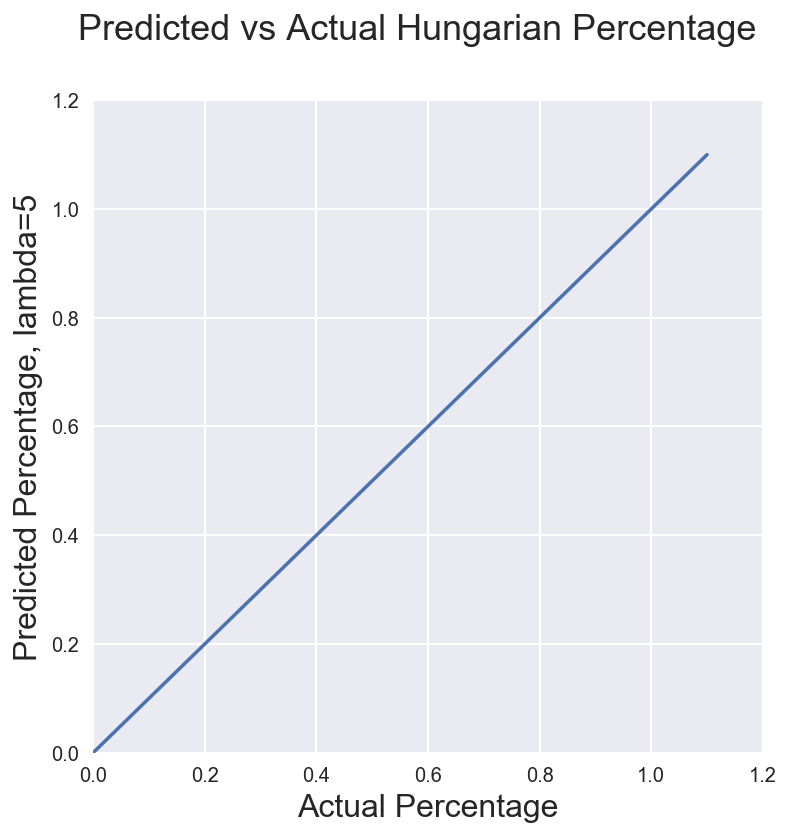

In [99]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_2.iloc[train], y_2.iloc[train], scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

# --- get the Figure and Axes all at once
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y_test_2, REALpredictions)
ax.plot(fake, fake)
ax.set_ylim((0, 1.2))
ax.set_xlim((0, 1.2))
ax.set_xlabel('Actual Percentage', size=16)
ax.set_ylabel('Predicted Percentage, lambda=5', size=16)
fig.suptitle('Predicted vs Actual Hungarian Percentage', size=18)
fig.savefig('predicted_vs_actual.png')

#cv_ridge = pd.Series(cv_ridge, index = alphas)
#cv_ridge.plot(title = "Validation")
#plt.xlabel("alpha")
#plt.ylabel("rmse")

In [62]:
cv_ridge.min()

1.5958793921595125

In [95]:
from sklearn import cross_validation
from scipy import stats

ss = cross_validation.KFold(n=len(X_2),n_folds=10, shuffle=True)
alphas_sem = {}
potential_alphas = [x for x in range(101) if x%5==0]

for a in potential_alphas:
    for k, (cvtrain, cvtest) in enumerate(ss):
        ridge = Ridge(alpha=a)
        sem_list = []
        ridge.fit(X_train_2, y_train_2)
        predictions = ridge.predict(X_train_2)
        residuals = predictions - y_train_2
        sem = stats.sem(residuals)
        sem_list.append(sem)
    sem_mean = np.array(sem_list).mean()
    alphas_sem[a] = sem_mean

In [96]:
fake = [float(x)/10 for x in range(12)]

In [97]:
ridge = Ridge(alpha=5)
ridge.fit(X_train_2, y_train_2)
REALpredictions = ridge.predict(X_test_2)
REALresiduals = REALpredictions - y_test_2

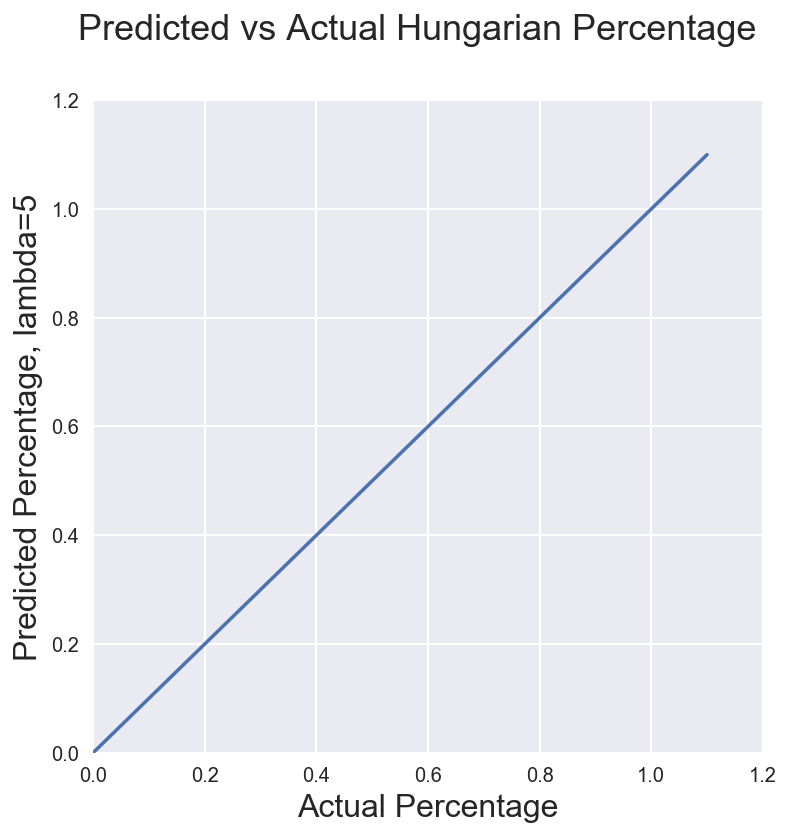

In [98]:
# --- get the Figure and Axes all at once
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y_test_2, REALpredictions)
ax.plot(fake, fake)
ax.set_ylim((0, 1.2))
ax.set_xlim((0, 1.2))
ax.set_xlabel('Actual Percentage', size=16)
ax.set_ylabel('Predicted Percentage, lambda=5', size=16)
fig.suptitle('Predicted vs Actual Hungarian Percentage', size=18)
fig.savefig('predicted_vs_actual.png')